# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
numerical= titanic.select_dtypes(['number'])
numerical.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
categorical=titanic.select_dtypes(['object'])
categorical.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
plt.style.use('classic')
plt.rcParams['figure.figsize']=(12,6)


#### Use the appropriate visulalization to show the distribution of the column `Age`

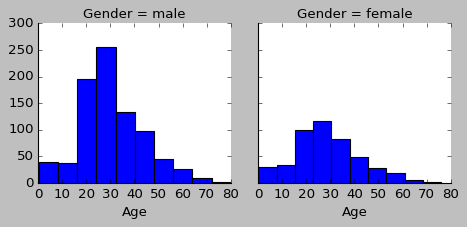

In [11]:
#Solución TA-Ovi, se muestra mejor con un histograma que con un diagrama de puntos:
    
g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age')
age_cant=age.rename(columns= {'Gender':'Cantidad'})

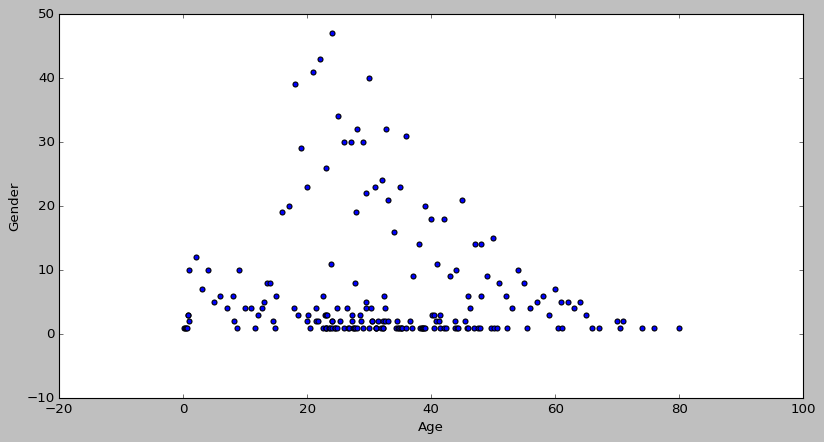

In [10]:
#Esta es nuestra solución (diagrama de puntos):

age=titanic.groupby('Age').agg({'Gender':'count'}).reset_index()

age.plot.scatter('Age','Gender')
age_cant=age.rename(columns= {'Gender':'Cantidad'})


#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

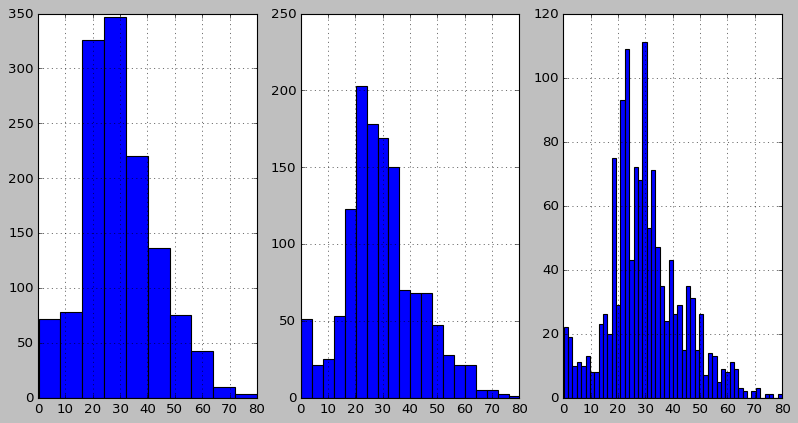

In [8]:
plt.subplot(1,3,1)
titanic['Age'].hist()
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)

#### Whether the bin size affects your plot? Why?

A menor bins se agrupan más los datos, y a mayor bins se desagregan

#### Use seaborn to show the distribution of the column `Age`

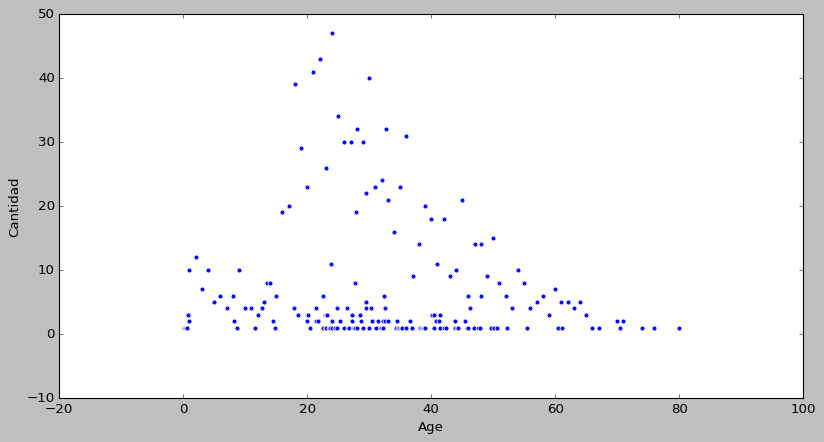

In [14]:
sns.scatterplot(x='Age', y ='Cantidad', data = age_cant)


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

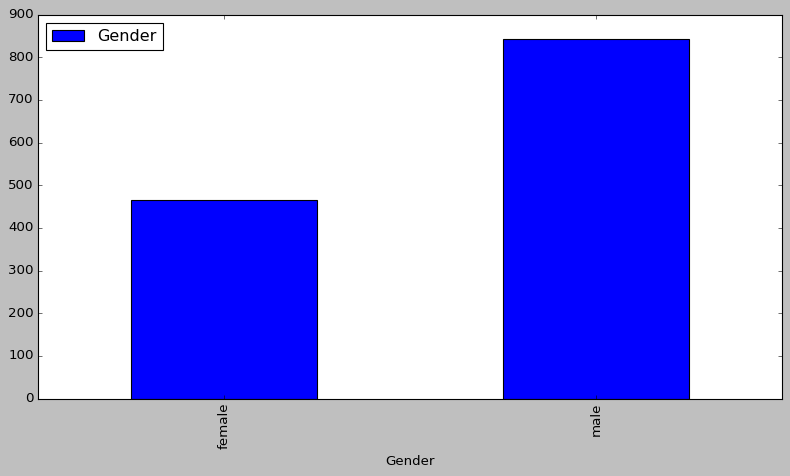

In [15]:
gender= titanic.groupby('Gender').agg({'Gender': 'count'})

gender.plot.bar();

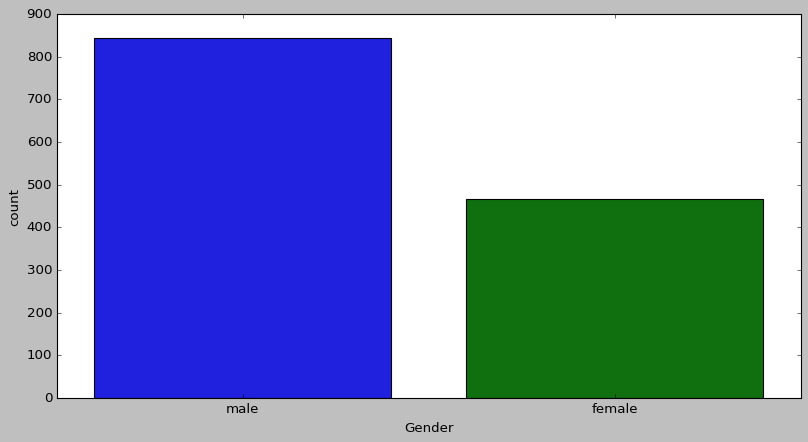

In [16]:
sns.countplot(x='Gender', data = titanic)


#### Use the appropriate plot to visualize the column `Pclass` 


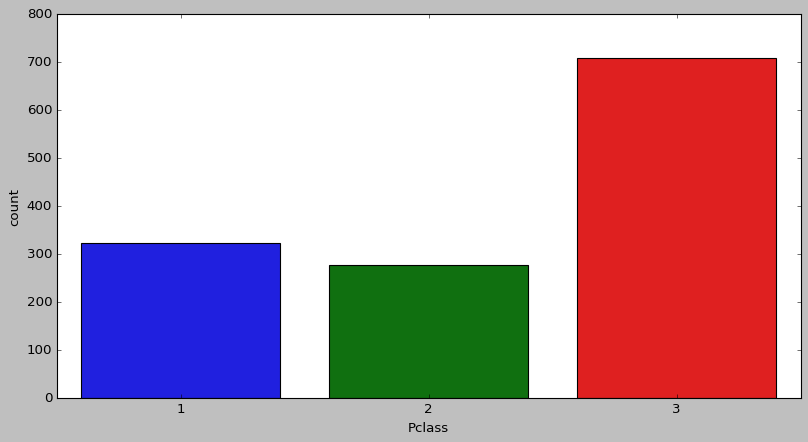

In [17]:
sns.countplot(x='Pclass', data = titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

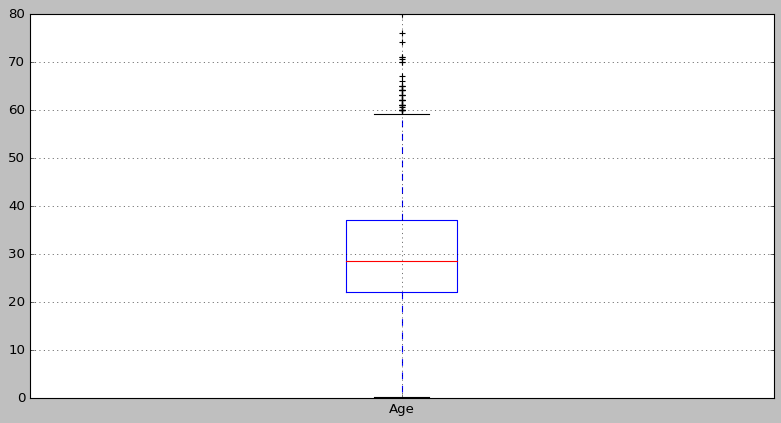

In [18]:
titanic.boxplot(column='Age')

#### What does the previous plot tell you about the feature `Age`? Comment.

La edad mínima está cercana a 0. El rango medio está entre los 20 y los 40, y la edad máxima está por encima de 60.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

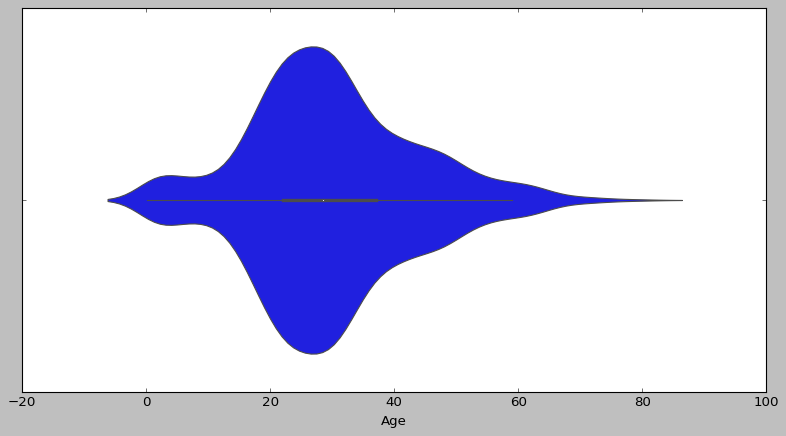

In [19]:
sns.violinplot(x='Age', data=titanic)


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

Confirma la información del anterior gráfico, aparece mayor concentración de personas con edad entre los 20 y los 40, y que a partir de los 60 la disperción es mayor.



#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

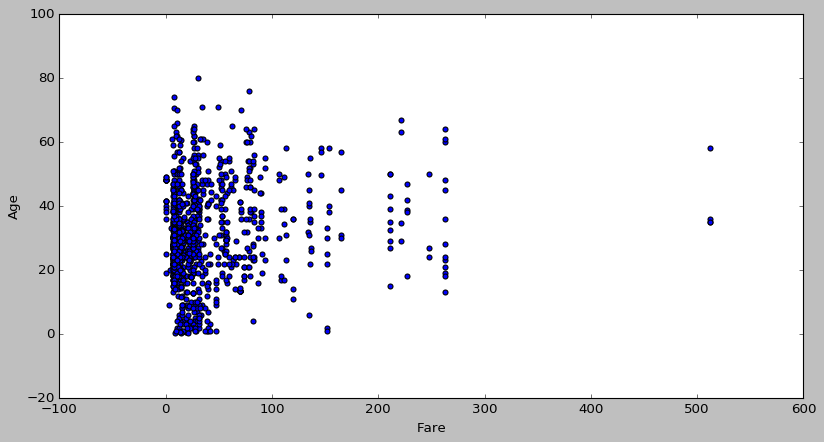

In [21]:
titanic.plot.scatter('Fare','Age')


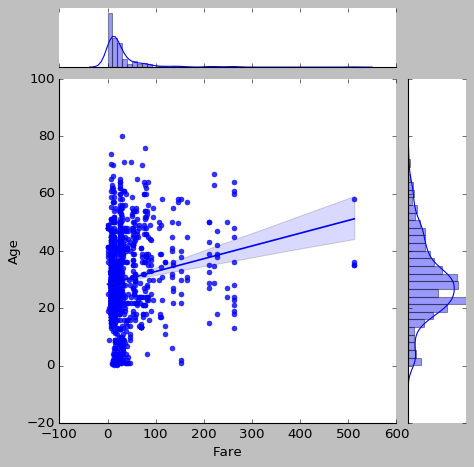

In [22]:
sns.jointplot("Fare", "Age", data=titanic,
                  kind="reg")


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

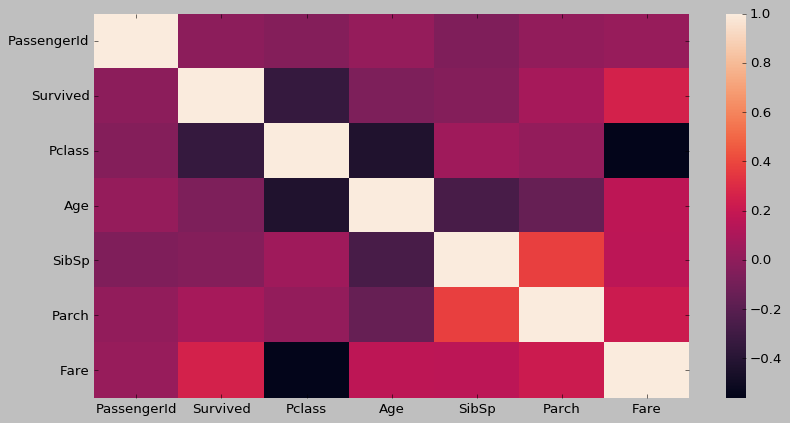

In [23]:
sns.heatmap(titanic.corr())

#### According to the previous plot, what are the most correlated feature? Comment.

- Se relaciona el número de supervivientes con hombres adultos.



#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

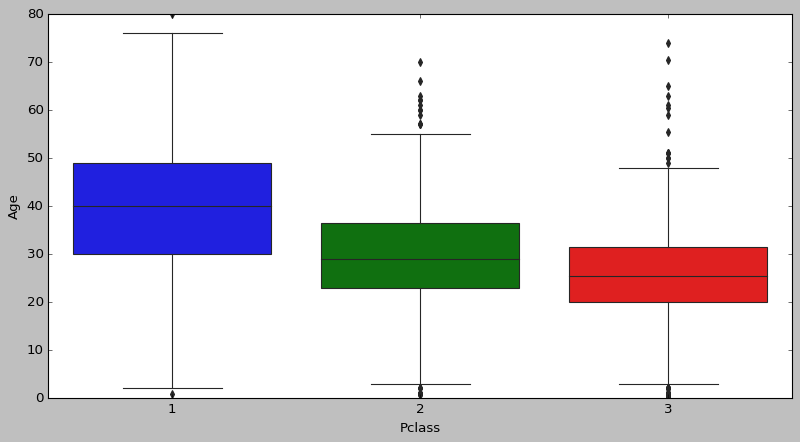

In [24]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

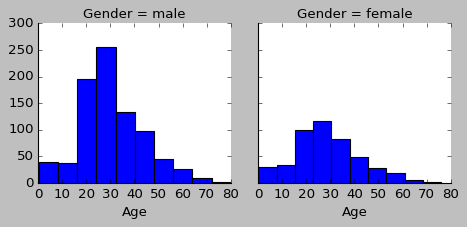

In [25]:
#Solución TA-Ovi:

g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age')